#  Import necessary libraries

In [437]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

**Read the train data**

In [438]:
df=pd.read_csv("/kaggle/input/titanic/train.csv")


In [439]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Lets check unique value counts in each columns**

In [440]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

**Brief information on train data**

In [441]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [442]:
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


**Lets drop unnecessary columns**

In [443]:
df=df.drop(["PassengerId","Name","Cabin","Ticket"],axis=1)

In [444]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [445]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

**Fill the null values in Age column with median**

In [446]:
df.Age=df.Age.fillna(df.Age.median())

In [447]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [448]:
df.Survived.value_counts(normalize=True)*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

* 38% people survived out of 891.

In [449]:
df.Pclass.value_counts(normalize=True)*100

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64

* Most of the people in 3 Pclass

In [450]:
df.Sex.value_counts(normalize=True)*100

male      64.758698
female    35.241302
Name: Sex, dtype: float64

* Male count is 64% out of 891.

In [451]:
df.SibSp.value_counts(normalize=True)*100

0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: SibSp, dtype: float64

* 68 % people does not have sibllings.

In [452]:
df.Parch.value_counts(normalize=True)*100

0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64

In [453]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [454]:
max_count=df.Embarked.value_counts().max()

In [455]:
max_count

644

**Replacing null values with max count in Embarked column**

In [456]:
df.Embarked=df.Embarked.fillna(df.Embarked.mode())

In [457]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [458]:
df.Fare.unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

*** Now we cleaned all the data. Its ready for model prediction**

In [459]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


#                                                                              Data Visualization

<AxesSubplot:xlabel='Survived', ylabel='count'>

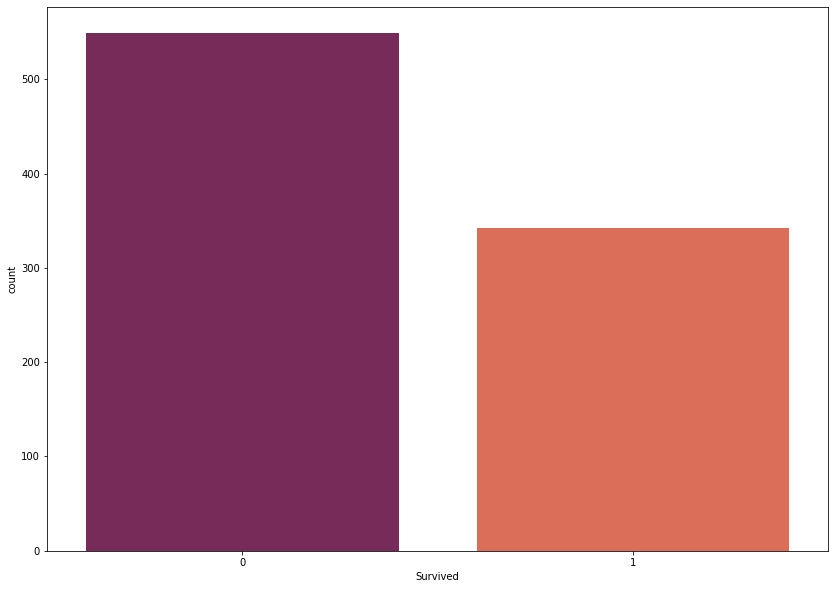

In [460]:
plt.figure(figsize=(14,10))
sns.countplot(x="Survived",data=df,palette="rocket")


<AxesSubplot:xlabel='Sex', ylabel='count'>

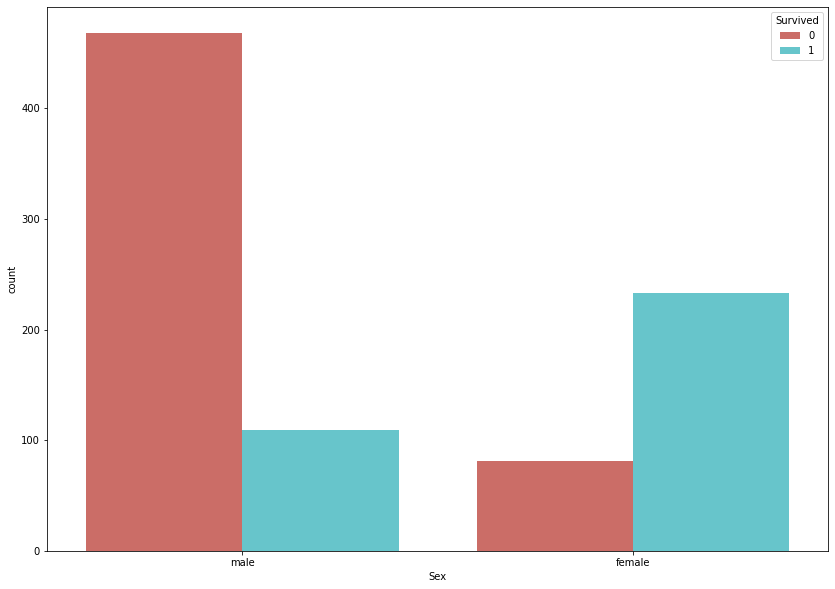

In [461]:
plt.figure(figsize=(14,10))
sns.countplot(x="Sex",data=df,palette="hls",hue="Survived")


* **From the above plot we can observe that female survival rate is more when compared to male**

<AxesSubplot:xlabel='Embarked', ylabel='count'>

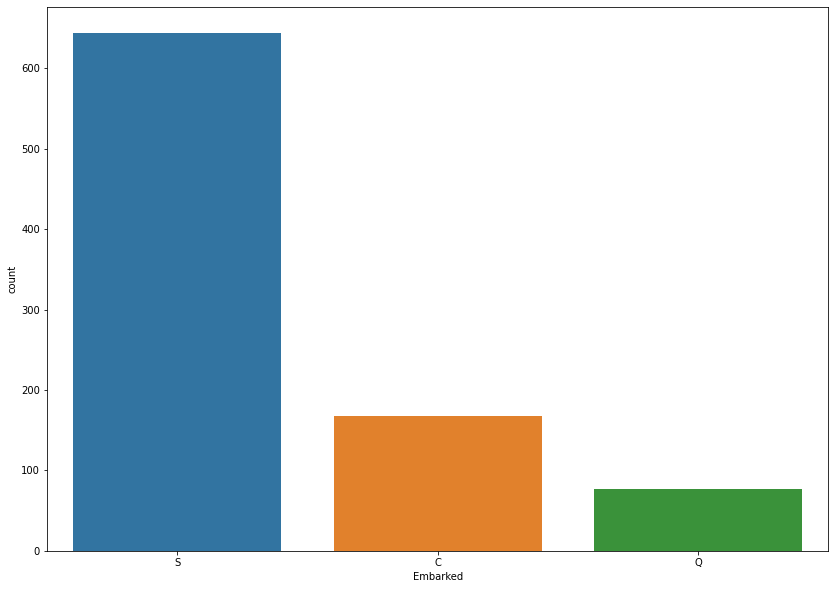

In [462]:
plt.figure(figsize=(14,10))
sns.countplot(x="Embarked",data=df)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

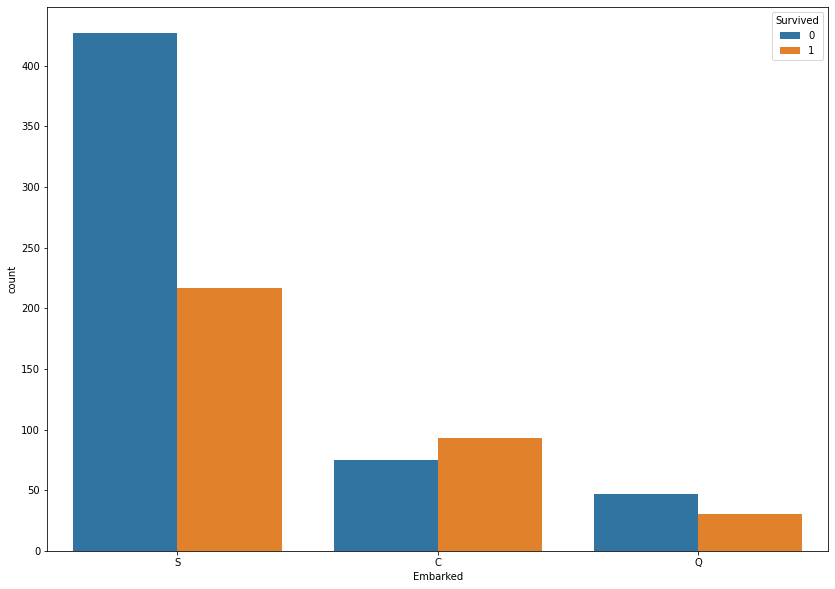

In [463]:
plt.figure(figsize=(14,10))
sns.countplot(x="Embarked",data=df,hue="Survived")

* **Survival rate is more in Embarked C**

In [464]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

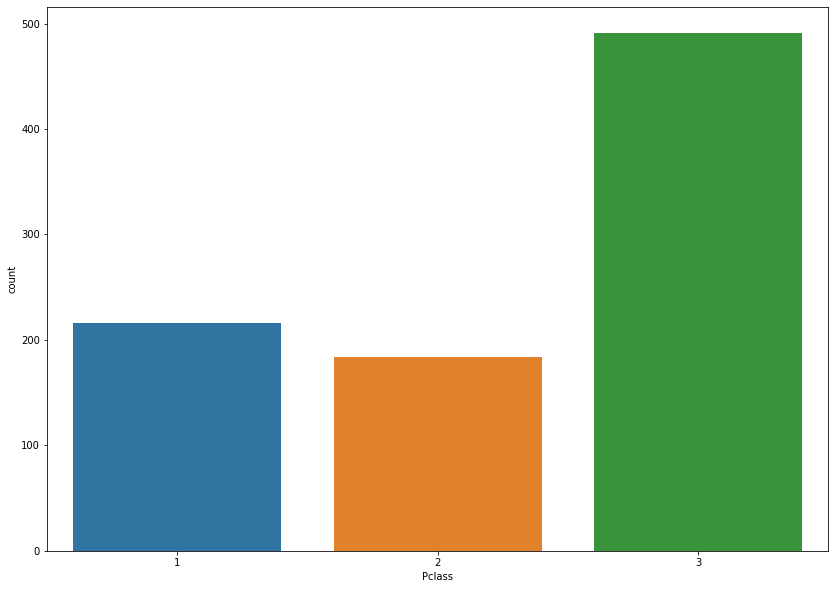

In [465]:
plt.figure(figsize=(14,10))
sns.countplot(x="Pclass",data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

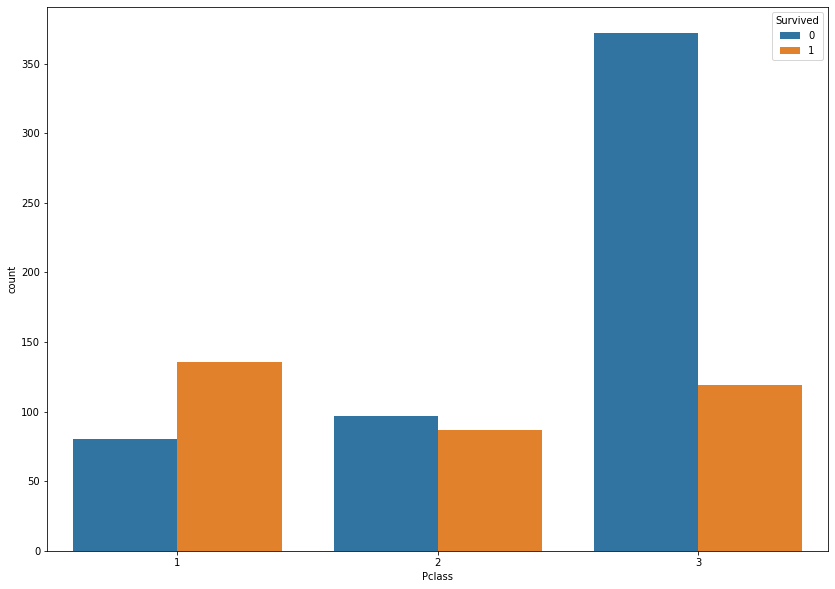

In [466]:
plt.figure(figsize=(14,10))
sns.countplot(x="Pclass",data=df,hue="Survived")

* **Survival rate is highest in Pclass 1**

In [467]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [468]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


**Lets group SibSp and Parch column as Family size.**

In [469]:
df["family_size"]=df["SibSp"]+df["Parch"]+1

In [470]:
df.drop(["SibSp","Parch"],axis=1)

,Survived,Pclass,Sex,Age,Fare,Embarked,family_size
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1
...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,1
887,1,1,female,19.0,30.0000,S,1
888,0,3,female,28.0,23.4500,S,4
889,1,1,male,26.0,30.0000,C,1


In [471]:
df.Age.max()

80.0

In [472]:
df.Age=pd.cut(df["Age"],bins=[0,12,21,40,100],labels=["childhood","teenage","adulthood","elder"])

In [473]:
df.Fare.unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [474]:
df.Fare.max()

512.3292

In [475]:
df.Fare=pd.cut(df["Fare"],bins=[0,170,340,520],labels=["low","average","high"])

In [476]:
df.Fare

0      low
1      low
2      low
3      low
4      low
      ... 
886    low
887    low
888    low
889    low
890    low
Name: Fare, Length: 891, dtype: category
Categories (3, object): ['low' < 'average' < 'high']

**Converting categorical data into Numerical data using get_dummies function**

In [477]:
df=pd.get_dummies(df,columns=["Embarked","Age","Fare"])

In [478]:
df

,Survived,Pclass,Sex,SibSp,Parch,family_size,Embarked_C,Embarked_Q,Embarked_S,Age_childhood,Age_teenage,Age_adulthood,Age_elder,Fare_low,Fare_average,Fare_high
0,0,3,male,1,0,2,0,0,1,0,0,1,0,1,0,0
1,1,1,female,1,0,2,1,0,0,0,0,1,0,1,0,0
2,1,3,female,0,0,1,0,0,1,0,0,1,0,1,0,0
3,1,1,female,1,0,2,0,0,1,0,0,1,0,1,0,0
4,0,3,male,0,0,1,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,1,0,0,1,0,0,1,0,1,0,0
887,1,1,female,0,0,1,0,0,1,0,1,0,0,1,0,0
888,0,3,female,1,2,4,0,0,1,0,0,1,0,1,0,0
889,1,1,male,0,0,1,1,0,0,0,0,1,0,1,0,0


In [479]:
df["Sex"]=df.Sex.map({"male":0,"female":1})

In [480]:
df

,Survived,Pclass,Sex,SibSp,Parch,family_size,Embarked_C,Embarked_Q,Embarked_S,Age_childhood,Age_teenage,Age_adulthood,Age_elder,Fare_low,Fare_average,Fare_high
0,0,3,0,1,0,2,0,0,1,0,0,1,0,1,0,0
1,1,1,1,1,0,2,1,0,0,0,0,1,0,1,0,0
2,1,3,1,0,0,1,0,0,1,0,0,1,0,1,0,0
3,1,1,1,1,0,2,0,0,1,0,0,1,0,1,0,0
4,0,3,0,0,0,1,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,0,1,0,0,1,0,0,1,0,1,0,0
887,1,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0
888,0,3,1,1,2,4,0,0,1,0,0,1,0,1,0,0
889,1,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0


# Test Data Analysis

In [481]:
test_df=pd.read_csv("/kaggle/input/titanic/test.csv")

In [482]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [483]:
test_df=test_df.drop(columns=["PassengerId","Name","Ticket","Cabin"],axis=1)

In [484]:
test_df.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [485]:
test_df.Age=test_df.Age.fillna(test_df.Age.median())

In [486]:
test_df.Fare=test_df.Fare.fillna(test_df.Fare.median())

In [487]:
test_df["family_size"]=test_df["SibSp"]+test_df["Parch"]+1

In [488]:
test_df.Age=pd.cut(test_df["Age"],bins=[0,12,21,40,100],labels=["childhood","teenage","adulthood","elder"])

In [489]:
test_df.Fare=pd.cut(test_df["Fare"],bins=[0,170,340,520],labels=["low","average","high"])

In [490]:
test_df["Sex"]=test_df.Sex.map({"male":0,"female":1})

In [491]:
test_df=pd.get_dummies(test_df,columns=["Embarked","Age","Fare"])

In [492]:
test_df.isnull().sum()

Pclass           0
Sex              0
SibSp            0
Parch            0
family_size      0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
Age_childhood    0
Age_teenage      0
Age_adulthood    0
Age_elder        0
Fare_low         0
Fare_average     0
Fare_high        0
dtype: int64

In [493]:
test_df

,Pclass,Sex,SibSp,Parch,family_size,Embarked_C,Embarked_Q,Embarked_S,Age_childhood,Age_teenage,Age_adulthood,Age_elder,Fare_low,Fare_average,Fare_high
0,3,0,0,0,1,0,1,0,0,0,1,0,1,0,0
1,3,1,1,0,2,0,0,1,0,0,0,1,1,0,0
2,2,0,0,0,1,0,1,0,0,0,0,1,1,0,0
3,3,0,0,0,1,0,0,1,0,0,1,0,1,0,0
4,3,1,1,1,3,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,0,0,1,0,0,1,0,0,1,0,1,0,0
414,1,1,0,0,1,1,0,0,0,0,1,0,1,0,0
415,3,0,0,0,1,0,0,1,0,0,1,0,1,0,0
416,3,0,0,0,1,0,0,1,0,0,1,0,1,0,0


# Prediction using Different Classification models

In [494]:
from sklearn.model_selection import cross_val_score #score evaluation

**X- Independent variale**

In [495]:
X=df.drop(["Survived"],axis=1)

**y- Dependent variable**

In [496]:
y=df["Survived"]

In [497]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

# Logistic regression

In [498]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_test_predictions_lr=lr.predict(X_test)

In [499]:
a=metrics.classification_report(y_test,y_test_predictions_lr)
accuracy_lr=metrics.accuracy_score(y_test,y_test_predictions_lr)
print("Accuracy of the Logistic Regression model is",accuracy_lr)
result_lr=cross_val_score(lr,X,y,cv=10,scoring='accuracy')
print('The cross validated score for LR is:',round(result_lr.mean()*100,2))


Accuracy of the Logistic Regression model is 0.8156424581005587
The cross validated score for LR is: 80.36


# DecisionTree Classifier

In [500]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_test_predictions_dt=lr.predict(X_test)

In [501]:
a=metrics.classification_report(y_test,y_test_predictions_dt)
accuracy_dt=metrics.accuracy_score(y_test,y_test_predictions_dt)
print("Accuracy of the Decision Tree model is",accuracy_dt)
result_dt=cross_val_score(dt,X,y,cv=10,scoring='accuracy')
print('The cross validated score for Decision TRee model is:',round(result_dt.mean()*100,2))

Accuracy of the Decision Tree model is 0.8156424581005587
The cross validated score for Decision TRee model is: 79.81


# Random Forest Classifier

In [502]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
rf.fit(X_train,y_train)
y_test_predictions_rf=rf.predict(X_test)

In [503]:
a=metrics.classification_report(y_test,y_test_predictions_rf)
accuracy_rf=metrics.accuracy_score(y_test,y_test_predictions_rf)
print("Accuracy of the Random Forest model is",accuracy_rf)
result_rf=cross_val_score(rf,X,y,cv=10,scoring='accuracy')
print('The cross validated score for Random Forest Classifier is:',round(result_rf.mean()*100,2))

Accuracy of the Random Forest model is 0.8212290502793296
The cross validated score for Random Forest Classifier is: 80.7


# Support Vector Machine

In [504]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train,y_train)
y_test_predictions_sv=sv.predict(X_test)

In [505]:
a=metrics.classification_report(y_test,y_test_predictions_sv)
accuracy_sv=metrics.accuracy_score(y_test,y_test_predictions_sv)
print("Accuracy of the Support Vector machine model is",accuracy_sv)
result_sv=cross_val_score(sv,X,y,cv=10,scoring='accuracy')
print('The cross validated score for SVM is:',round(result_sv.mean()*100,2))

Accuracy of the Support Vector machine model is 0.8156424581005587
The cross validated score for SVM is: 82.61


# K Nearest Neighbour

In [506]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=4)
kn.fit(X_train,y_train)
y_test_predictions_kn=kn.predict(X_test)

In [507]:
a=metrics.classification_report(y_test,y_test_predictions_kn)
accuracy_kn=metrics.accuracy_score(y_test,y_test_predictions_kn)
print("Accuracy of the KNN  model is",accuracy_kn)
result_kn=cross_val_score(kn,X,y,cv=10,scoring='accuracy')
print('The cross validated score for KNN is:',round(result_kn.mean()*100,2))

Accuracy of the KNN  model is 0.8156424581005587
The cross validated score for KNN is: 78.12


In [508]:
pd.DataFrame({"model_name":["Logistic_Regression","Decision_Tree",
                             "Random_Forest","Support_VM","KNN"],
               "Score":[result_lr.mean(),result_dt.mean(),
                        result_rf.mean(),result_sv.mean(),
                        result_kn.mean()]}

)

,model_name,Score
0,Logistic_Regression,0.803620
1,Decision_Tree,0.798065
2,Random_Forest,0.806979
3,Support_VM,0.826055
4,KNN,0.781223


**SVM model has good Score**

In [509]:
predictions=sv.predict(test_df)

In [510]:
predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [511]:
submission=pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [512]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [513]:
submission["Survived"]=predictions
submission.to_csv("total1.csv")